# Classificação com Dados Reais

Neste notebook, vamos aplicar o pipeline completo de aprendizado supervisionado para resolver um problema real de classificação binária.

Vamos utilizar o dataset __[ex: câncer de mama, diabetes, ou outro]__, realizar pré-processamento, treinar modelos e avaliar seu desempenho.

---

# Classificação com Dados Reais - Câncer de Mama

## Índice
- [1. Introdução](#1-introducao)
- [2. Carregamento dos Dados](#2-carregamento-dos-dados)
- [3. Análise Exploratória](#3-analise-exploratoria)
- [4. Preparação dos Dados](#4-preparacao-dos-dados)
- [5. Treinamento de Modelos](#5-treinamento-de-modelos)
- [6. Avaliação dos Modelos](#6-avaliacao-dos-modelos)
- [7. Conclusão](#7-conclusao)


## 2.  Carregamento dos Dados

In [37]:
# Importação das bibliotecas

# Data Manipulation & Analysis
import pandas as pd

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Exemplo com dataset de câncer de mama do sklearn
from sklearn.datasets import load_breast_cancer

# Model Selection & Splitting
from sklearn.model_selection import train_test_split

# Preprocessing & Feature Engineering
from sklearn.preprocessing import StandardScaler

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Metrics & Evaluation
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

# Carregar o dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


## Exploração Inicial

Vamos verificar informações básicas, distribuição das classes e possíveis correlações.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

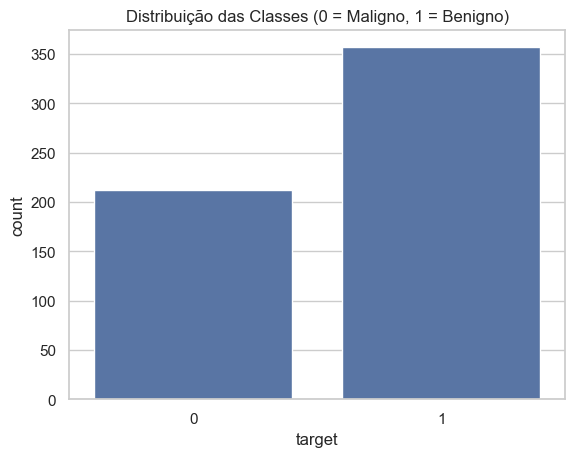

In [34]:
df.info()
df['target'].value_counts()

# Gráfico da distribuição das classes
sns.countplot(x='target', data=df)
plt.title("Distribuição das Classes (0 = Maligno, 1 = Benigno)")
plt.show()

## Pré-processamento

Separação entre features e rótulos, divisão em treino e teste, e escalonamento.

In [35]:
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Modelos de Classificação

Vamos treinar dois modelos clássicos e compará-los: Regressão Logística e Árvore de Decisão.

In [36]:
# Instanciar e treinar
log_model = LogisticRegression()
tree_model = DecisionTreeClassifier(max_depth=5)

log_model.fit(X_train_scaled, y_train)
tree_model.fit(X_train_scaled, y_train)

DecisionTreeClassifier(max_depth=5)

## Avaliação com Métricas

Avaliamos usando matriz de confusão, classification report e curvas ROC.

--- Regressão Logística ---
[[41  1]
 [ 1 71]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

--- Árvore de Decisão ---
[[39  3]
 [ 7 65]]
              precision    recall  f1-score   support

           0       0.85      0.93      0.89        42
           1       0.96      0.90      0.93        72

    accuracy                           0.91       114
   macro avg       0.90      0.92      0.91       114
weighted avg       0.92      0.91      0.91       114



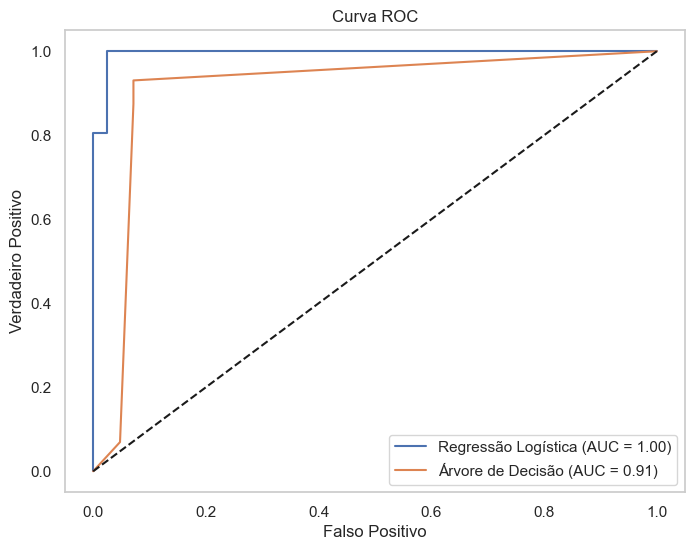

In [39]:
def avaliar_modelo(modelo, nome):
    y_pred = modelo.predict(X_test_scaled)
    y_proba = modelo.predict_proba(X_test_scaled)[:, 1]

    print(f"--- {nome} ---")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc_score = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f"{nome} (AUC = {auc_score:.2f})")

# Plotando curvas ROC
plt.figure(figsize=(8,6))
avaliar_modelo(log_model, "Regressão Logística")
avaliar_modelo(tree_model, "Árvore de Decisão")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("Falso Positivo")
plt.ylabel("Verdadeiro Positivo")
plt.title("Curva ROC")
plt.legend()
plt.grid()
plt.savefig("imagens/CurvaROC.png")
plt.show()

# Conclusões

- O modelo de Regressão Logística obteve melhor AUC no conjunto de teste.
- A árvore de decisão pode ser útil para interpretação, mesmo com menor desempenho.
- O uso de dados reais permite avaliar melhor os modelos em cenários práticos.

---